## Remove duplicate lines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])


## Duplicate rows with multiple labels
change path to annotation file to flatten the annotations for each culture

In [3]:
data = pd.read_csv("../new_data/persian_annotations.csv")
cols = ["id", "filename","emotions","emoji","gender","confidence","comment","intensity"]
contents = []
for i in range(0, data.shape[0]):
    row = data.iloc[i]
    for emotion in row['emotions'].split(','):
        # for emoji in row['emoji'].split(','):
        contents.append([row["id"], row["filename"], emotion, row['emoji'], row["gender"], row["confidence"],
                     row["comment"], row["intensity"]])
flattened_df = pd.DataFrame(columns=cols, data=contents)

flattened_df

,id,filename,emotions,emoji,gender,confidence,comment,intensity
0,1,persian/vid_58.mp4,contempt,none,female,3,NaN,2
1,1,persian/vid_58.mp4,disgust,none,female,3,NaN,2
2,2,persian/vid_27.mp4,none,unamused,male,5,NaN,5
3,3,persian/vid_89.mp4,anger,hatred,female,5,NaN,2
4,4,persian/vid_61.mp4,annoyed,angry,female,5,NaN,4
...,...,...,...,...,...,...,...,...
665,884,persian/vid_24.mp4,contempt,smirk,female,4,NaN,4
666,884,persian/vid_24.mp4,disgust,smirk,female,4,NaN,4
667,885,persian/vid_62.mp4,annoyed,angry,female,5,NaN,4
668,885,persian/vid_62.mp4,furious,angry,female,5,NaN,4


### Frequency of emotions before voting

<AxesSubplot:title={'center':'Freq. of labels before voting'}>

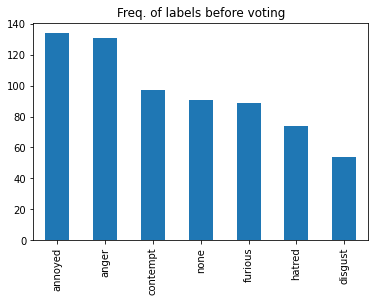

In [4]:
flattened_df['emotions'].value_counts().plot(kind='bar', title='Freq. of labels before voting')

### Flattening emojis into new columns
(No need for this right now)

In [5]:
emoji_expanded = flattened_df['emoji'].str.split(',', expand=True)
emoji_expanded.columns = ['emoji'+str(i) for i in emoji_expanded.columns]
flattened_df_concat = pd.concat([flattened_df,emoji_expanded], axis=1)

## Emotion Voting

              filename  gender            emotions
0    persian/vid_1.mp4    male           [annoyed]
1   persian/vid_10.mp4    male    [contempt, none]
2   persian/vid_11.mp4    male          [contempt]
3   persian/vid_12.mp4    male    [contempt, none]
4   persian/vid_13.mp4    male             [anger]
5   persian/vid_14.mp4  female              [none]
6   persian/vid_15.mp4    male            [hatred]
7   persian/vid_16.mp4    male          [contempt]
8   persian/vid_17.mp4    male          [contempt]
9   persian/vid_18.mp4  female           [disgust]
10  persian/vid_19.mp4    male              [none]
11   persian/vid_2.mp4    male           [annoyed]
12  persian/vid_20.mp4    male          [contempt]
13  persian/vid_21.mp4    male              [none]
14  persian/vid_22.mp4  female           [annoyed]
15  persian/vid_23.mp4  female          [contempt]
16  persian/vid_24.mp4  female  [contempt, hatred]
17  persian/vid_25.mp4  female              [none]
18  persian/vid_26.mp4  female 

<AxesSubplot:title={'center':'Freq. of emotions after voting'}>

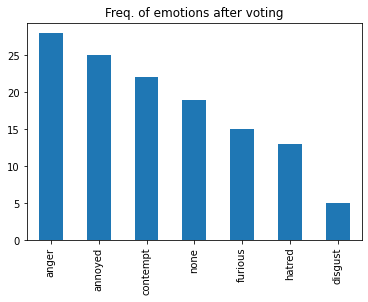

In [8]:
# labels_df = flattened_df.groupby(['filename', 'gender'])['emotions'].agg(pd.Series.mode).to_frame()
labels_df = flattened_df.groupby(['filename', 'gender'])['emotions'].apply(lambda x: list(x.mode()))
# labels_df.to_csv("../new_data/labels.csv", index='filename')
# labels_df = pd.read_csv("../new_data/labels.csv")
labels_df['emotions'] = labels_df['emotions'].apply(eval)
print(labels_df.head(20))
to_1D(labels_df["emotions"]).value_counts().plot(kind='bar', title='Freq. of emotions after voting', ylabel='')
# flattened_df['emotions'].value_counts()

## Emoji Voting

In [17]:
persian_data = pd.read_csv("../new_data/persian_annotations.csv")
cols = ["id", "filename","emotions","emoji","gender","confidence","comment","intensity"]
contents = []
for i in range(0, persian_data.shape[0]):
    row = persian_data.iloc[i]
    for emoji in row['emoji'].split(','):
        # for emoji in row['emoji'].split(','):
        contents.append([row["id"], row["filename"], row['emotions'], emoji, row["gender"], row["confidence"],
                     row["comment"], row["intensity"]])
emoji_flattened_df = pd.DataFrame(columns=cols, data=contents)

emoji_flattened_df

,id,filename,emotions,emoji,gender,confidence,comment,intensity
0,1,persian/vid_58.mp4,"contempt,disgust",none,female,3,NaN,2
1,2,persian/vid_27.mp4,none,unamused,male,5,NaN,5
2,3,persian/vid_89.mp4,anger,hatred,female,5,NaN,2
3,4,persian/vid_61.mp4,annoyed,angry,female,5,NaN,4
4,5,persian/vid_49.mp4,anger,hatred,male,5,NaN,6
...,...,...,...,...,...,...,...,...
661,883,persian/vid_26.mp4,annoyed,smirk,female,4,NaN,4
662,883,persian/vid_26.mp4,annoyed,weary,female,4,NaN,4
663,884,persian/vid_24.mp4,"contempt,disgust",smirk,female,4,NaN,4
664,885,persian/vid_62.mp4,"annoyed,furious",angry,female,5,NaN,4


<AxesSubplot:title={'center':'Freq. of emojis before voting'}>

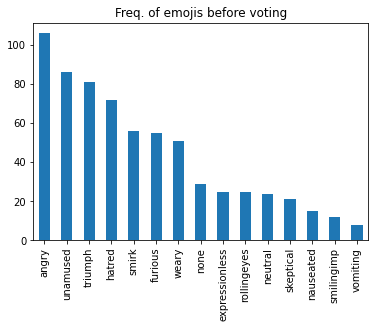

In [18]:
emoji_flattened_df['emoji'].value_counts().plot(kind='bar', title='Freq. of emojis before voting', ylabel='')

### Voting:

In [27]:
## pivot_table = emoji_flattened_df.pivot_table(index='filename', columns='emoji', values='emotions', aggfunc='', fill_value=0)

## same as pivot_table
# df = emoji_flattened_df.groupby(['filename', 'emoji'])['emoji'].count()\
#     .unstack(fill_value=0) \
#     .rename_axis(None, axis=1)

## apply() returns each mode in a separate row
# labels_df = emoji_flattened_df.groupby(['filename'])['emoji'].apply(pd.Series.mode).to_frame()
labels_df = emoji_flattened_df.groupby(['filename', 'gender'])['emoji'].apply(lambda x: list(x.mode()))
# print(labels_df.head(10))
# #labels_df.to_csv("../new_data/emoji_labels.csv")
# emoji_flattened_df['emoji'].value_counts()

labels_df
# labels_df.to_csv("../new_data/emoji_labels.csv")

<AxesSubplot:title={'center':'Freq. of emojis after voting'}>

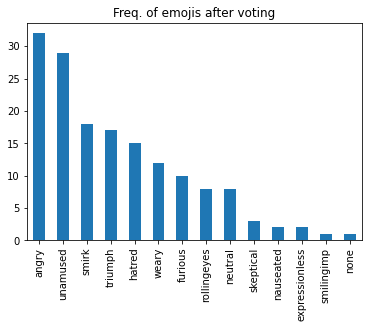

In [6]:
# labels_df.to_csv("../new_data/emoji_labels.csv")
emoji_labels = pd.read_csv("../new_data/emoji_labels.csv")
emoji_labels["emoji"] = emoji_labels["emoji"].apply(eval)
to_1D(emoji_labels["emoji"]).value_counts().plot(kind='bar', title='Freq. of emojis after voting', ylabel='')

### Average of reported intensity

In [14]:
labels_df = pd.read_csv("../new_data/labels.csv", index_col='filename')

In [15]:
average_intensity = flattened_df.groupby(['filename'])['intensity'].mean()
labels_df = pd.concat([labels_df, average_intensity], axis=1)
labels_df

,gender,emotions,intensity
filename,,,
persian/vid_1.mp4,male,['annoyed'],2.500000
persian/vid_10.mp4,male,['contempt'],2.500000
persian/vid_11.mp4,male,['contempt'],2.625000
persian/vid_12.mp4,male,['contempt'],2.400000
persian/vid_13.mp4,male,['anger'],1.750000
...,...,...,...
persian/vid_93.mp4,female,['hatred'],3.666667
persian/vid_94.mp4,male,['none'],1.500000
persian/vid_95.mp4,male,"['contempt', 'hatred']",3.250000


## Correlation between emotions
Before voting on them

In [29]:
df = flattened_df.groupby(['filename', 'emotions'])['emotions'].count()\
    .unstack(fill_value=0) \
    .reset_index() \
    .rename_axis(None, axis=1)
# flattened_df['emotions'].unique()
df

,filename,anger,annoyed,contempt,disgust,furious,hatred,none
0,persian/vid_1.mp4,0,3,0,1,0,0,2
1,persian/vid_10.mp4,0,1,2,1,0,0,2
2,persian/vid_11.mp4,0,2,3,1,0,0,2
3,persian/vid_12.mp4,0,1,2,0,0,0,2
4,persian/vid_13.mp4,4,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...
91,persian/vid_93.mp4,3,0,1,2,2,4,0
92,persian/vid_94.mp4,1,1,1,0,0,0,3
93,persian/vid_95.mp4,1,1,2,0,0,2,2
94,persian/vid_96.mp4,0,0,3,0,1,0,1


In [30]:
emotions_corr = df.corr(method = "pearson")
emotions_corr

# fig, ax = plt.subplots(figsize = (9,5))
# sn.heatmap(emotions_corr, cmap = "Blues")
# plt.xticks(rotation=50)
# plt.savefig("heatmap.png", dpi = 300)

,anger,annoyed,contempt,disgust,furious,hatred,none
anger,1.00,-0.06,-0.40,-0.17,0.37,0.32,-0.54
annoyed,-0.06,1.00,-0.32,0.12,-0.15,-0.20,-0.12
contempt,-0.40,-0.32,1.00,0.15,-0.42,-0.13,0.17
disgust,-0.17,0.12,0.15,1.00,-0.11,0.17,-0.24
furious,0.37,-0.15,-0.42,-0.11,1.00,0.27,-0.47
hatred,0.32,-0.20,-0.13,0.17,0.27,1.00,-0.37
none,-0.54,-0.12,0.17,-0.24,-0.47,-0.37,1.00


In [31]:
import krippendorff
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(value_counts=df.drop('filename', axis=1).values,
                                                                          level_of_measurement='nominal'))


Krippendorff's alpha for nominal metric:  0.07589428340718574


## Emoji correlation and K's alpha:

In [18]:
df = emoji_flattened_df.groupby(['filename', 'emoji'])['emoji'].count()\
    .unstack(fill_value=0) \
    .reset_index() \
    .rename_axis(None, axis=1)
emoji_corr = df.corr(method = "pearson")

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
emoji_corr

,angry,expressionless,furious,hatred,nauseated,neutral,none,rollingeyes,skeptical,smilingimp,smirk,triumph,unamused,vomiting,weary
angry,1.00,-0.22,0.21,0.30,0.05,-0.20,-0.27,-0.26,-0.14,-0.07,-0.39,0.32,-0.32,0.03,-0.07
expressionless,-0.22,1.00,-0.05,-0.10,0.11,0.26,-0.15,0.06,-0.07,-0.17,-0.03,-0.09,-0.01,-0.08,0.16
furious,0.21,-0.05,1.00,0.54,-0.11,-0.19,-0.26,-0.25,-0.19,-0.07,-0.28,0.53,-0.39,0.05,-0.20
hatred,0.30,-0.10,0.54,1.00,-0.03,-0.28,-0.20,-0.27,-0.27,-0.00,-0.29,0.41,-0.41,0.03,-0.12
nauseated,0.05,0.11,-0.11,-0.03,1.00,-0.15,-0.16,-0.04,-0.12,-0.11,-0.04,0.15,0.04,-0.09,0.20
neutral,-0.20,0.26,-0.19,-0.28,-0.15,1.00,0.26,0.33,0.03,0.00,-0.02,-0.30,0.15,-0.11,-0.17
none,-0.27,-0.15,-0.26,-0.20,-0.16,0.26,1.00,0.12,0.11,0.21,0.21,-0.33,0.00,-0.09,-0.21
rollingeyes,-0.26,0.06,-0.25,-0.27,-0.04,0.33,0.12,1.00,0.14,-0.05,0.01,-0.30,0.33,0.11,-0.10
skeptical,-0.14,-0.07,-0.19,-0.27,-0.12,0.03,0.11,0.14,1.00,-0.14,0.08,-0.24,0.14,-0.05,-0.12
smilingimp,-0.07,-0.17,-0.07,-0.00,-0.11,0.00,0.21,-0.05,-0.14,1.00,0.12,-0.00,-0.04,0.08,-0.13


In [19]:
import krippendorff
print("Krippendorff's alpha for Persian/emojis: ", krippendorff.alpha(value_counts=df.drop('filename', axis=1).values,
                                                                          level_of_measurement='nominal'))

Krippendorff's alpha for Persian/emojis:  0.06840437032702384


In [39]:
labels_df

,gender,emotions
filename,,
persian/vid_1.mp4,male,['annoyed']
persian/vid_10.mp4,male,['contempt']
persian/vid_11.mp4,male,['contempt']
persian/vid_12.mp4,male,['contempt']
persian/vid_13.mp4,male,['anger']
...,...,...
persian/vid_93.mp4,female,['hatred']
persian/vid_94.mp4,male,['none']
persian/vid_95.mp4,male,"['contempt', 'hatred']"


In [20]:
persian_data.describe()

,id,confidence,annotator_individuality,intensity
count,478.00,478.00,478.00,478.00
mean,412.83,3.98,2.90,2.98
std,287.74,0.98,1.05,1.79
min,1.00,1.00,1.00,0.00
25%,146.25,3.00,2.00,1.00
50%,316.50,4.00,3.00,3.00
75%,649.75,5.00,4.00,4.00
max,886.00,5.00,4.00,6.00
